In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
data=pd.read_csv('Life Expectancy Data.csv').convert_dtypes()

# DATA AUDIT


In [3]:
data.head()

,Country,Year,Status,Life_expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65,1154,19.1,83,6,8.16,65,0.1,584.25921,33736494.0,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62,492,18.6,86,58,8.18,62,0.1,612.696514,327582.0,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64,430,18.1,89,62,8.13,64,0.1,631.744976,31731688.0,0.47,9.9
3,Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67,2787,17.6,93,67,8.52,67,0.1,669.959,3696958.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68,3013,17.2,97,68,7.87,68,0.1,63.537231,2978599.0,0.454,9.5


In [4]:
data.tail()

,Country,Year,Status,Life_expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Income composition of resources,Schooling
2933,Zimbabwe,2004,Developing,44.3,723,27,4.36,0.0,68,31,27.1,42,67,7.13,65,33.6,454.366654,12777511.0,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715,26,4.06,0.0,7,998,26.7,41,7,6.52,68,36.7,453.351155,12633897.0,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73,25,4.43,0.0,73,304,26.3,40,73,6.53,71,39.8,57.34834,125525.0,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686,25,1.72,0.0,76,529,25.9,39,76,6.16,75,42.1,548.587312,12366165.0,0.427,9.8
2937,Zimbabwe,2000,Developing,46.0,665,24,1.68,0.0,79,1483,25.5,39,78,7.1,78,43.5,547.358878,12222251.0,0.434,9.8


In [5]:
data.columns

Index(['Country', 'Year', 'Status', 'Life_expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [6]:
data.drop(columns=['Year','Status','Schooling','Country'],inplace=True)

In [7]:
data.isna().sum()

Life_expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
Income composition of resources    167
dtype: int64

In [8]:
data[['Alcohol','Hepatitis B']]= data[['Alcohol','Hepatitis B']].fillna(0)

In [9]:
data.drop(columns=['Total expenditure','GDP','Population','Income composition of resources'],inplace=True)


In [10]:
data.dropna(subset=['Life_expectancy'],inplace=True)

In [11]:
data.dropna(thresh=data.shape[1]*0.8//1,inplace=True)

In [12]:
data.head()

,Life_expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS
0,65.0,263,62,0.01,71.279624,65,1154,19.1,83,6,65,0.1
1,59.9,271,64,0.01,73.523582,62,492,18.6,86,58,62,0.1
2,59.9,268,66,0.01,73.219243,64,430,18.1,89,62,64,0.1
3,59.5,272,69,0.01,78.184215,67,2787,17.6,93,67,67,0.1
4,59.2,275,71,0.01,7.097109,68,3013,17.2,97,68,68,0.1


#EDA

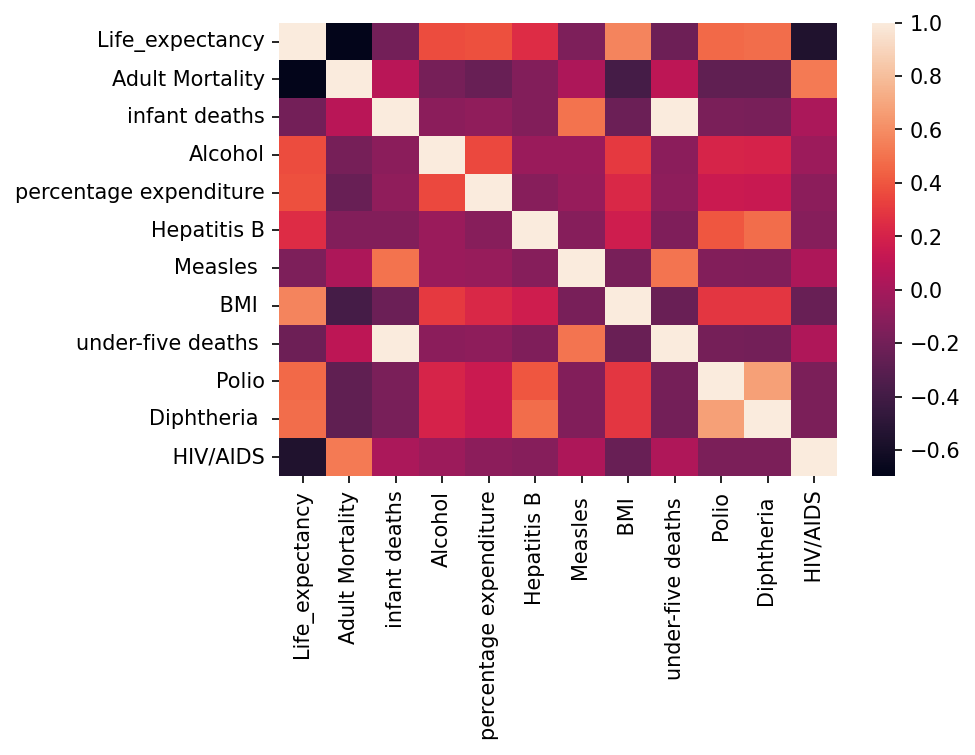

In [13]:
plt.figure(dpi=150)
sns.heatmap(data=data.corr())
plt.show()

<AxesSubplot:xlabel='Life_expectancy', ylabel='Alcohol'>

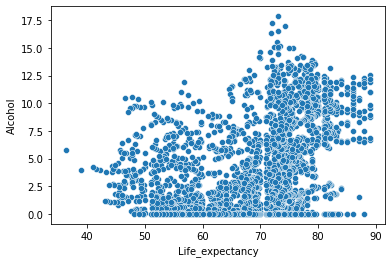

In [14]:
sns.scatterplot(x=data['Life_expectancy'],y=data['Alcohol'])

In [15]:
#sns.pairplot(data)

In [16]:
result= 'Life_expectancy'
features= data.columns.difference(set(result))


In [17]:
x_train,x_test,y_train,y_test = train_test_split(data[features],data[result],test_size=0.2,random_state=37)

In [18]:
#Outlier treatment
for i in data.select_dtypes('float64'):
    top = x_train[i].quantile(0.01)
    lower = x_train[i].quantile(0.99)
    x_train[i]=np.clip(x_train[i],lower,top)

In [19]:
#null value treatment
missing_values = {}
for i in x_train:
    if pd.api.types.is_number(x_train[i]):
        missing_values[i]=x_train[i].median()
    else:
        missing_values[i] = x_train[i].mode()[0]
missing_values
x_train.fillna(missing_values,inplace=True)

In [20]:
#catergorical
x_train = pd.get_dummies(x_train)


In [21]:
x_train

,BMI,HIV/AIDS,Adult Mortality,Alcohol,Diphtheria,Hepatitis B,Life_expectancy,Measles,Polio,infant deaths,percentage expenditure,under-five deaths
8,15.2,0.1,295,0.02,63,63,57.5,1141,63,82,10.910156,113
1826,12.4,0.1,238,0.19,72,0,63.1,6749,72,40,23.183946,54
2820,58.3,0.1,123,6.35,96,96,75.7,0,96,1,152.54484,1
308,49.9,0.2,198,3.93,95,95,69.3,0,95,9,0.0,11
873,56.7,0.1,167,13.45,95,94,74.2,0,95,0,225.072362,0
...,...,...,...,...,...,...,...,...,...,...,...,...
990,47.5,0.1,132,3.36,75,48,72.7,216,74,1,70.541853,2
2308,18.8,2.1,496,3.99,65,0,45.7,7,69,30,38.524548,47
846,19.5,3.6,334,7.13,37,0,53.8,18,46,3,309.783459,4
363,46.9,0.1,17,6.85,99,96,72.0,0,99,81,186.609049,93


In [22]:
#prelim model
model = sm.OLS(np.log(y_train.astype('float')),x_train.astype('float')).fit()

In [23]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        Life_expectancy   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                          7.111e+04
Date:                Wed, 14 Sep 2022   Prob (F-statistic):                        0.00
Time:                        15:36:19   Log-Likelihood:                          214.83
No. Observations:                2342   AIC:                                     -405.7
Df Residuals:                    2330   BIC:                                     -336.6
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
 BMI                      -0.0021      0.000     -7.860      0.000      -0.003      -0.002
 HIV/AIDS                  0.0225      0.001     17.378      0.000       0.020       0.025
Adult Mortality            0.0015   4.38e-05     34.975      0.000       0.001       0.002
Alcohol                   -0.0153      0.001    -12.044      0.000      -0.018      -0.013
Diphtheria                -0.0004      0.000     -1.218      0.223      -0.001       0.000
Hepatitis B               -0.0005      0.000     -3.544      0.000      -0.001      -0.000
Life_expectancy            0.0596      0.000    163.799      0.000       0.059       0.060
Measles                 1.654e-06   4.82e-07      3.431      0.001    7.09e-07     2.6e-06
Polio                      0.0002      0.000      0.766      0.444      -0.000       0.001
infant deaths             -0.0064      0.001    -12.788      0.000      -0.007      -0.005
percentage expenditure -3.782e-05   2.96e-06    -12.795      0.000   -4.36e-05    -3.2e-05
under-five deaths          0.0050      0.000     13.370      0.000       0.004       0.006
==============================================================================
Omnibus:                      235.504   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              504.712
Skew:                           0.623   Prob(JB):                    2.53e-110
Kurtosis:                       4.902   Cond. No.                     3.34e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.34e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
def validate(true,predict):
    print('MAE:',metrics.mean_absolute_error(true,predict))
    print('MAPE:',metrics.mean_absolute_percentage_error(true,predict))
    print('RMSE=',np.sqrt(metrics.mean_squared_error(true,predict)))
    print('R Squared:',metrics.r2_score(true,predict))
validate(y_train,model.predict(x_train))



MAE: 65.06562533094298
MAPE: 0.9384571465067176
RMSE= 65.71227123358935
R Squared: -47.329717845669094


In [25]:
x_train.columns[model.pvalues<0.1]

Index([' BMI ', ' HIV/AIDS', 'Adult Mortality', 'Alcohol', 'Hepatitis B',
       'Life_expectancy', 'Measles ', 'infant deaths',
       'percentage expenditure', 'under-five deaths '],
      dtype='object')

Feature Selection

In [26]:
#p-value judgement
f1 = set(x_train.columns[model.pvalues<0.1])

In [27]:
#VIF
def VIF(x,drop = []):
    x = x.drop(columns=drop,axis=1)
    output= pd.DataFrame()
    output['Columns']=x.columns
    x=x.values.astype('float')
    output['VIF']= [variance_inflation_factor(x,i) for i in range(x.shape[1])]
    return output.sort_values('VIF',ascending=False)
    

f2=VIF(x_train,drop=['infant deaths','Life_expectancy','Polio'])
f2
 

,Columns,VIF
4,Diphtheria,11.909820
5,Hepatitis B,5.523250
0,BMI,5.248532
2,Adult Mortality,3.375068
3,Alcohol,2.662521
1,HIV/AIDS,1.668439
7,percentage expenditure,1.479753
8,under-five deaths,1.472920
6,Measles,1.405872


In [28]:
f3=('Diphtheria')

In [29]:
final_cols=f1.union(f2).difference(f3)

In [30]:
final_cols

{' BMI ',
 ' HIV/AIDS',
 'Adult Mortality',
 'Alcohol',
 'Columns',
 'Hepatitis B',
 'Life_expectancy',
 'Measles ',
 'VIF',
 'infant deaths',
 'percentage expenditure',
 'under-five deaths '}

CONVERSION FUNCTION

In [31]:
def convert(x):

    for i in data.select_dtypes('float64'):
        top = x[i].quantile(0.01)
        lower = x[i].quantile(0.99)
        x[i]=np.clip(x[i],lower,top)

    x.fillna(missing_values,inplace=True)
    x = pd.get_dummies(x)
    return x.convert_dtypes()


x_test = convert(x_test)

    

FINAL MODEL BUILDING

In [32]:
model = sm.OLS(np.log(y_train.astype(float)),x_train.astype(float)).fit()

In [33]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        Life_expectancy   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                          7.111e+04
Date:                Wed, 14 Sep 2022   Prob (F-statistic):                        0.00
Time:                        15:36:20   Log-Likelihood:                          214.83
No. Observations:                2342   AIC:                                     -405.7
Df Residuals:                    2330   BIC:                                     -336.6
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
 BMI                      -0.0021      0.000     -7.860      0.000      -0.003      -0.002
 HIV/AIDS                  0.0225      0.001     17.378      0.000       0.020       0.025
Adult Mortality            0.0015   4.38e-05     34.975      0.000       0.001       0.002
Alcohol                   -0.0153      0.001    -12.044      0.000      -0.018      -0.013
Diphtheria                -0.0004      0.000     -1.218      0.223      -0.001       0.000
Hepatitis B               -0.0005      0.000     -3.544      0.000      -0.001      -0.000
Life_expectancy            0.0596      0.000    163.799      0.000       0.059       0.060
Measles                 1.654e-06   4.82e-07      3.431      0.001    7.09e-07     2.6e-06
Polio                      0.0002      0.000      0.766      0.444      -0.000       0.001
infant deaths             -0.0064      0.001    -12.788      0.000      -0.007      -0.005
percentage expenditure -3.782e-05   2.96e-06    -12.795      0.000   -4.36e-05    -3.2e-05
under-five deaths          0.0050      0.000     13.370      0.000       0.004       0.006
==============================================================================
Omnibus:                      235.504   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              504.712
Skew:                           0.623   Prob(JB):                    2.53e-110
Kurtosis:                       4.902   Cond. No.                     3.34e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.34e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
validate(np.log(y_train),model.predict(x_train))

MAE: 0.1601868615475917
MAPE: 0.03840200262327284
RMSE= 0.22076243608120305
R Squared: -1.2849724952063877


Evaluation

In [35]:
validate(np.log(y_train),model.predict(x_train))

MAE: 0.1601868615475917
MAPE: 0.03840200262327284
RMSE= 0.22076243608120305
R Squared: -1.2849724952063877


In [41]:
residuals= np.log(y_train)- model.predict(x_train).astype(float)

<AxesSubplot:>

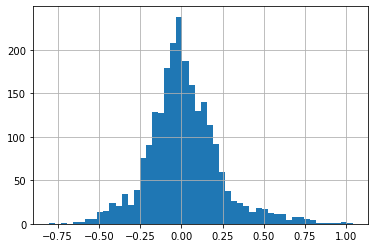

In [44]:
residuals.hist(bins=50)

In [45]:
# The residuals are formaing a normal distribution which what we assume
"""
BMI	                    -0.0021	
HIV/AIDS	             0.0225	
Adult Mortality	         0.0015	
Alcohol	                -0.0153	
Diphtheria	            -0.0004	
Hepatitis B	            -0.0005	
Measles	                 1.654e-06	
Polio	                 0.0002	
infant deaths	        -0.0064	
percentage expenditure	-3.782e-05	
under-five deaths	     0.0050	
"""